In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

C:\Users\ulasz\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ulasz\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# wczytanie danych
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [3]:
#pipeline do obróbki danych
cols_numerical = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

transformer_numerical = Pipeline(steps = [
    ('num_trans', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers = [
    ('numerical', transformer_numerical, cols_numerical)
])

pipe = Pipeline(steps = [
                ('preprocessor', preprocessor)
            ])


In [4]:
# obróbka danych
scaled_train_data = pipe.fit_transform(train_data)
X_train = pd.DataFrame(scaled_train_data, columns=cols_numerical)
y_train = train_data['price_range'].values.ravel()
scaled_test_data = pipe.fit_transform(test_data)
X_test = pd.DataFrame(scaled_test_data, columns=cols_numerical)
y_test = test_data['price_range'].values.ravel()

Baseline - Dummy classifier

In [5]:
dummy_model = DummyClassifier(strategy='stratified', random_state = 1)  
dummy_model.fit(X_train, y_train)

y_pred_dummy = dummy_model.predict(X_test)
classification_rep_dummy = classification_report(y_test, y_pred_dummy)
print("Baseline Dummy Classifier Classification Report:\n", classification_rep_dummy)

Baseline Dummy Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.24      0.26        94
           1       0.21      0.26      0.23        98
           2       0.25      0.25      0.25        99
           3       0.27      0.23      0.25       109

    accuracy                           0.24       400
   macro avg       0.25      0.25      0.25       400
weighted avg       0.25      0.24      0.25       400



Sprawdzamy basic modele 

In [6]:
model1 = DecisionTreeClassifier(random_state=1, max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = LogisticRegression(max_iter=2000, penalty= 'none', solver = 'saga')
model4 = SVC()
model5 = GaussianNB()
estimators=[('DecisionTree', model1), ('KNN', model2), ('LR', model3), ('SVM', model4), ('GausianNB', model5)]

In [7]:
for estimator in estimators:
    estimator[1].fit(X_train, y_train)
    y_pred = estimator[1].predict(X_test)
    print(f'{estimator[0]} classification_report:')
    print(classification_report(y_test, y_pred))

DecisionTree classification_report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        94
           1       0.73      0.74      0.74        98
           2       0.69      0.67      0.68        99
           3       0.83      0.88      0.86       109

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400

KNN classification_report:
              precision    recall  f1-score   support

           0       0.52      0.60      0.55        94
           1       0.39      0.42      0.40        98
           2       0.45      0.52      0.48        99
           3       0.76      0.51      0.61       109

    accuracy                           0.51       400
   macro avg       0.53      0.51      0.51       400
weighted avg       0.54      0.51      0.52       400

LR classification_report:
              precision    recall  f1-sco

In [8]:
# crossvalidation na basic modelach żeby zobaczyc jaki jest ich średni score
models = [
    ('DecisionTree', model1),
    ('KNN', model2),
    ('LR', model3),
    ('SVM', model4),
    ('GaussianNB', model5)
]


scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']


results = {}


kfold = KFold(n_splits=5, shuffle=True, random_state=1)


for name, model in models:
    pipeline = Pipeline([('classifier', model)])
    cv_results = cross_validate(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
    results[name] = cv_results


for name, result in results.items():
    print(f'{name}:')
    for metric, scores in result.items():
        print(f'{metric}')
        print(f'Średnia: {scores.mean()}, Odchylenie standardowe: {scores.std()}')
    print()

DecisionTree:
fit_time
Średnia: 0.009985256195068359, Odchylenie standardowe: 0.002618345736469008
score_time
Średnia: 0.0053806304931640625, Odchylenie standardowe: 0.00205111649096494
test_accuracy
Średnia: 0.805625, Odchylenie standardowe: 0.007756046028744313
test_precision_macro
Średnia: 0.8067824660931364, Odchylenie standardowe: 0.0076184439905882225
test_recall_macro
Średnia: 0.8092214523590838, Odchylenie standardowe: 0.006967799242282055
test_f1_macro
Średnia: 0.8052969362696256, Odchylenie standardowe: 0.007282345912958674

KNN:
fit_time
Średnia: 0.0018916130065917969, Odchylenie standardowe: 0.0006616336286145229
score_time
Średnia: 0.02778735160827637, Odchylenie standardowe: 0.004590728567297959
test_accuracy
Średnia: 0.41187500000000005, Odchylenie standardowe: 0.01646492484039936
test_precision_macro
Średnia: 0.43148268469020834, Odchylenie standardowe: 0.01564473229166213
test_recall_macro
Średnia: 0.4124993709594401, Odchylenie standardowe: 0.016725008355725046
test_f

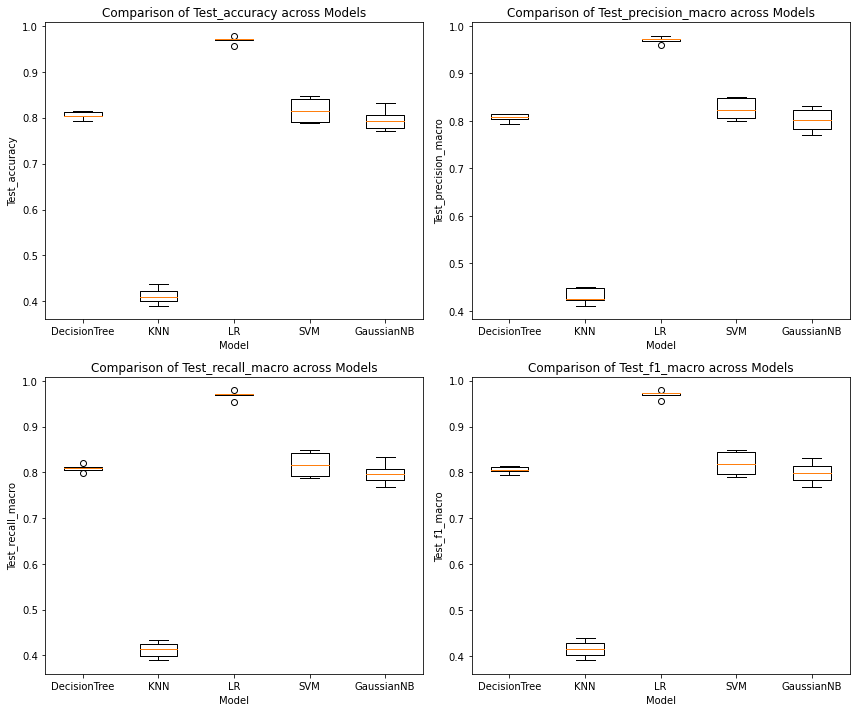

In [10]:
# wykres wyników crossvalidtion
model_names = list(results.keys())
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

metrics = ['test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_macro']

for i, metric in enumerate(metrics):

    metric_scores = [results[model][metric] for model in model_names]
    

    row = i // 2
    col = i % 2   
    ax = axes[row, col]
        
    ax.boxplot(metric_scores, labels=model_names)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f'Comparison of {metric.capitalize()} across Models')


plt.tight_layout()
plt.savefig('cv_metric.jpg', dpi=300)

Najlepiej wypada Logistic Regression więc szukamy najlepszych parametrów (trochę długo się liczy)

In [11]:
logistic_model = LogisticRegression(max_iter=6000, solver = 'saga')


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
    'l1_ratio': [0, 0.1, 1]
}


grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


print("Najlepsze parametry:", grid_search.best_params_)


best_logistic_model = grid_search.best_estimator_
y_pred = best_logistic_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

KeyboardInterrupt: 

In [35]:
best_logistic_model

LogisticRegression(C=0.001, l1_ratio=0, max_iter=6000, penalty='none',
                   solver='saga')

In [33]:

cm = confusion_matrix(y_test, y_pred)

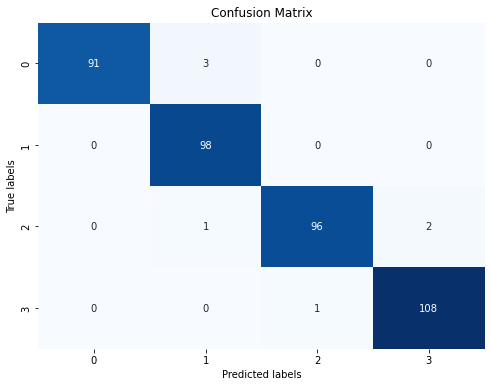

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()